# **Logistic Regression**

* Logistic Regression is a supervised learning algorithm used for binary classification problems by predicting the probability that a given input belongs to a particular class.

* Logistic Regression predicts the probability $P(Y=1|X)$ using the logistic (sigmoid) function:

  $P(Y=1|X) = \sigma(W^TX+b)$

  where:

  - $\sigma(z)=1/(1+e^{-z})$ is the sigmoid function;
  - $W$ are the model's weights (coefficients);
  - $X$ is the feature vector;
  - $b$ is the bias term.

* Logistic Regression minimizes the **log loss** (binary cross-entropy):

  $J(W, b) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right]$

  where:

  - $y_i$ is the actual class label (0 or 1);
  - $\hat{y}_i$ is the predicted probability;
  - $m$ is the total number of training examples.

* We update the parameters $W$ and $b$ using gradient descent;

# **Implementation of Logistic Regression from scratch with Python**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

**Logistic Regression model**


In [2]:
class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z)) # Sigmoid function

    def fit(self, X, y):
        m, n = X.shape
        self.weights = np.zeros(n)
        self.bias = 0

        for _ in range(self.epochs):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            # Gradient descent
            dw = (1 / m) * np.dot(X.T, (y_predicted - y))
            db = (1 / m) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        return (y_predicted >= 0.5).astype(int)

**Generate synthetic classification dataset**

In [3]:
X, y = make_classification(n_samples=1000, n_features=2, n_classes=2, random_state=42, n_informative=2, n_redundant=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Train and evaluate the model**

In [6]:
model = LogisticRegressionScratch(learning_rate=0.1, epochs=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.88
Confusion Matrix:
 [[89 12]
 [12 87]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88       101
           1       0.88      0.88      0.88        99

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.88      0.88      0.88       200



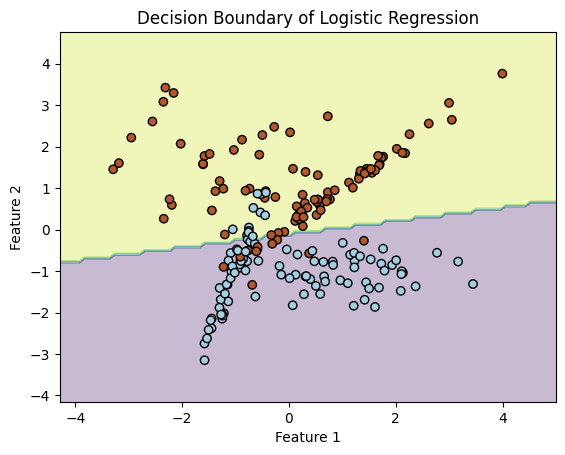

In [7]:
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k", cmap=plt.cm.Paired)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Decision Boundary of Logistic Regression")
    plt.show()

plot_decision_boundary(model, X_test, y_test)

# **Implementation using scikit-learn**

In [8]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred_sklearn = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_sklearn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_sklearn))
print("Classification Report:\n", classification_report(y_test, y_pred_sklearn))

Accuracy: 0.88
Confusion Matrix:
 [[89 12]
 [12 87]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88       101
           1       0.88      0.88      0.88        99

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.88      0.88      0.88       200



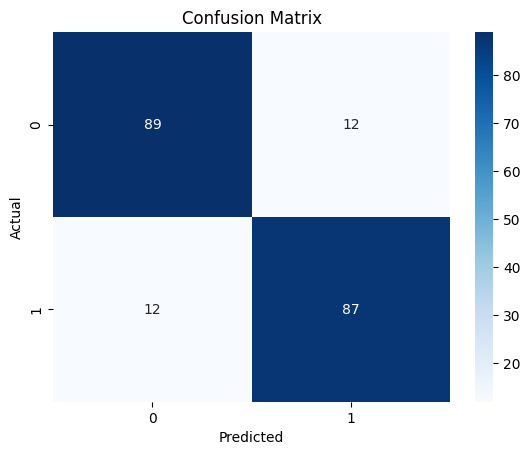

In [9]:
sns.heatmap(confusion_matrix(y_test, y_pred_sklearn), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()